In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
n = 512 # number of sampling points of a single unit cell
M = 5 # times the cell is repeated through all space
N = M*n # total number of sampling points
a0 = 1. # lattice constant
a = a0*M # lattice constant of the cristal
dx = a/N # space increment

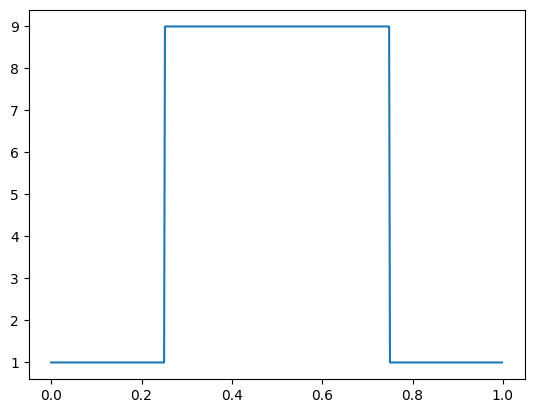

In [3]:
x_cell = np.arange(0, a0, dx) # sampling points in the unit cell
e1 = 1.; e2 = 9.
e_cell = e1 + (x_cell < 0.75*a0)*(x_cell > 0.25*a0)*(e2 - e1)
plt.figure()
plt.plot(x_cell, e_cell)
plt.show()

# Generalized FDFD Method In $S^1$

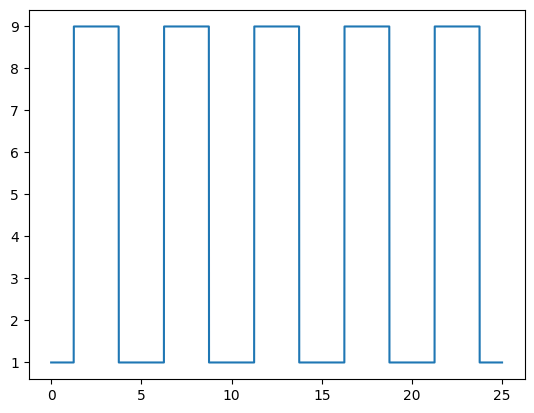

In [4]:
x = np.arange(0, a*M, dx*M)
e = np.array(list(e_cell)*M)
kappa = np.diag(e**-1)
plt.figure()
plt.plot(x, e)
plt.show()

In [5]:
D0 = np.diag([-2]*N, 0) + np.diag([1]*(N-1), -1) + np.diag([1]*(N-1), 1)
#D0[0,-1] = 1.; D0[-1,0]= 1.
D0 = D0.astype("float")
D0 = kappa @ D0 * dx**-2
print(D0)

[[-524288.  262144.       0. ...       0.       0.       0.]
 [ 262144. -524288.  262144. ...       0.       0.       0.]
 [      0.  262144. -524288. ...       0.       0.       0.]
 ...
 [      0.       0.       0. ... -524288.  262144.       0.]
 [      0.       0.       0. ...  262144. -524288.  262144.]
 [      0.       0.       0. ...       0.  262144. -524288.]]


In [6]:
B0 = np.zeros((N,n), dtype='complex')
k = np.pi*a0

for m in range(M):
    B0[m*n:(m+1)*n] = np.identity(n)

print(np.real(B0))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
Nk = 25
b = np.pi/a0
BZ = np.linspace(-b,b,Nk)
# BZ = [0]
band_structure = []
eigenmodes = []

for k in BZ:
    
    
    B = np.copy(B0)
    for m in range(M):
        B[m*n:(m+1)*n] *= np.exp(1j*k*a0*m)
    Binv = B.T.conj()
    
    D = np.copy(D0).astype("complex")
    D[0,-1] *= np.exp(-1j*M*k*a0); D[-1, 0] *= np.exp(1j*M*k*a0)
    D = Binv @ D @ B
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(D)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[:,inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
GFDFD_band_structure = np.array(band_structure)[:,:20] # keep the first 20 modes
GFDFD_eigenmodes = np.array(eigenmodes)[:,:,:20] # keep the first 20 modes

-3.141592653589793
-2.8797932657906435
-2.6179938779914944
-2.356194490192345
-2.0943951023931957
-1.8325957145940461
-1.5707963267948966
-1.3089969389957472
-1.0471975511965979
-0.7853981633974483
-0.5235987755982991
-0.2617993877991496
0.0
0.26179938779914913
0.5235987755982987
0.7853981633974478
1.0471975511965974
1.3089969389957465
1.5707963267948966
1.8325957145940457
2.094395102393195
2.356194490192345
2.617993877991494
2.879793265790643
3.141592653589793


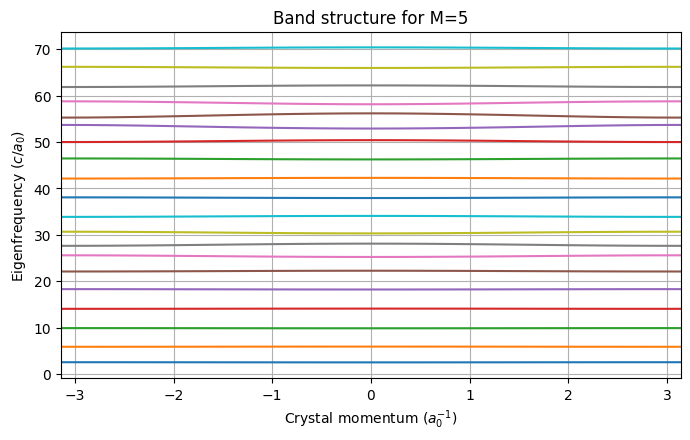

In [10]:
plt.figure(figsize=(8,4.5))
plt.title("Band structure for M="+str(M))
plt.plot(BZ, GFDFD_band_structure)
#plt.ylim([0,10])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")
plt.show()

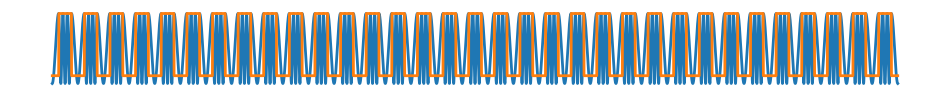

In [70]:
plt.figure(figsize=(12,1))
field1 = np.abs(GFDFD_eigenmodes[0][:,3])**2
#field2 = np.abs(GFDFD_eigenmodes[0][:,0])**2
#plt.grid()
plt.plot(x,list(field1)*M/max(field1), lw=2)
plt.plot(x,e/max(e_cell), lw=2)
plt.axis('off')
#plt.fill_between(x,0,list(field1)*M/max(field1), alpha=0.5)
#plt.plot(x,list(field2)*M/max(field2))
#plt.fill_between(x,0,list(field2)*M/max(field2), alpha=0.5)
plt.show()

In [202]:
#np.save("finite_crystal_band_structures/PBS_M"+str(M)+"_n"+str(n)+".npy", np.array(band_structure))

# Not using Bloch matrices

In [19]:
Dx = 0.5*(np.diag([1]*(N-1), 1) + np.diag([-1]*(N-1), -1))*dx**-2
print(Dx)
Dx = kappa @ Dx

[[      0.  524288.       0. ...       0.       0.       0.]
 [-524288.       0.  524288. ...       0.       0.       0.]
 [      0. -524288.       0. ...       0.       0.       0.]
 ...
 [      0.       0.       0. ...       0.  524288.       0.]
 [      0.       0.       0. ... -524288.       0.  524288.]
 [      0.       0.       0. ...       0. -524288.       0.]]


In [ ]:
Nk = 25
b = np.pi/a0
BZ = np.linspace(-b,b,Nk)
BZ = [0]
band_structure = []
eigenmodes = []

for k in BZ:
    print(k)
    
    D = kappa * k ** 2 - 2j*k*Dx - np.copy(D0).astype("complex")
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(D)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[:,inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
NonBloch_band_structure = np.array(band_structure)[:,:] # keep the first n modes
NonBloch_eigenmodes = np.array(eigenmodes)[:,:,:] # keep the first n modes

0


In [ ]:
plt.figure()
field = np.abs(NonBloch_eigenmodes[0][:,0])**2
#plt.grid()
plt.plot(x,e/max(e_cell), 'k', alpha=0.5)
plt.plot(x,list(field)/max(field))
#plt.fill_between(x,0,list(field)/max(field),alpha=0.5)
plt.show()

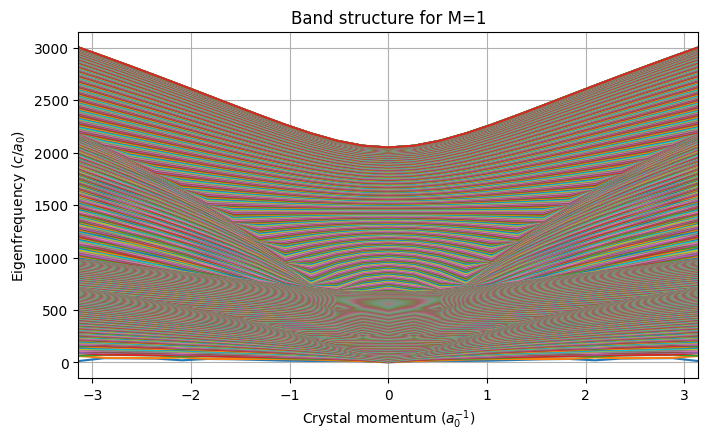

In [60]:
plt.figure(figsize=(8,4.5))
plt.title("Band structure for M="+str(M))
plt.plot(BZ, np.array(band_structure))
#plt.ylim([0,2000])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")
plt.show()

# Convergence 

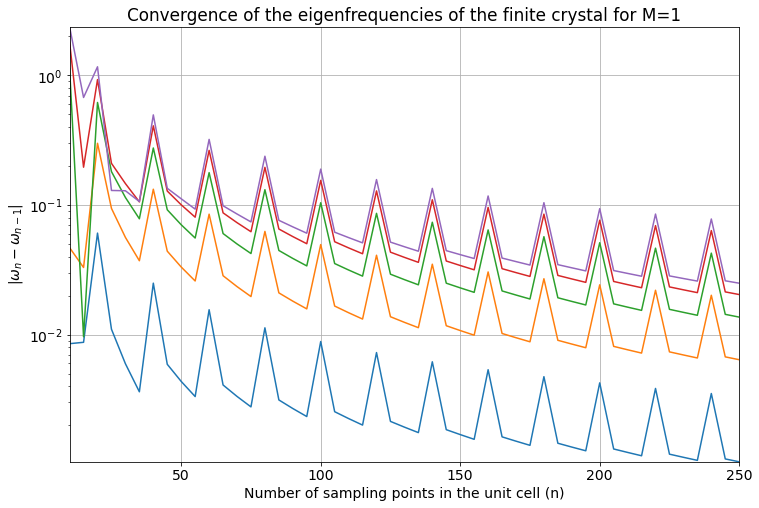

In [522]:
w = []
nmin = 5
nmax = 250
nstep = 5
s = 5 # s must be greater than or equal to nmin
nrange = list(range(nmin,nmax+nstep,nstep))
for i in nrange:
    pbs = np.load("finite_crystal_band_structures\PBS_M"+str(M)+"_n"+str(i)+".npy")
    w.append(pbs.mean(axis=0)[:s]) # keep the first s modes' mean over all the brillouin zone

plt.rcParams.update({'font.size': 14})
w = np.array(w)
err = np.abs(w[1:]-w[:-1])
plt.figure(figsize=(12,8))
plt.title("Convergence of the eigenfrequencies of the finite crystal for M=1")
plt.plot(nrange[1:], err)
plt.ylabel(r'$|\omega_n-\omega_{n-1}|$')
plt.yscale('log')
plt.xlabel("Number of sampling points in the unit cell (n)")
plt.grid()
plt.ylim([np.min(err),np.max(err)])
plt.xlim([nmin+nstep,nmax])
plt.savefig("finite_crystal_band_structures\convergence_M"+str(M)+".png")
plt.show()

# Actual modes

In [15]:
eigenfreqs, eigenvecs = np.linalg.eig(D0)
eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
inds = eigenfreqs.argsort()
eigenvecs = eigenvecs[:,inds]
eigenfreqs.sort()

In [16]:
np.save("finite_crystal_band_structures\Eigenfreqs_M"+str(M)+"_n"+str(n)+".npy", eigenfreqs)
np.save("finite_crystal_band_structures\Eigenmodes_M"+str(M)+"_n"+str(n)+".npy", eigenfreqs)

# PWE Method In $S^1$

In [12]:
lmax = n/2-1
l=np.arange(-lmax,lmax+1) 
N_l = np.shape(l)[0] # total number of plane waves considered in the expansion
G = 2*np.pi*l/a0 # lattice vectors
plane_waves = np.exp(1j*np.outer(G,x_cell))

V0 = simps(np.ones_like(x_cell), x_cell)
kappa = simps(np.conj(plane_waves)*e_cell**-1, x_cell)/V0
KAPPA = np.zeros((N_l,N_l), dtype='complex')
for i in range(N_l):
  for j in range(N_l):
    KAPPA[i,j] = simps( np.exp(-1j*(G[i]-G[j])*x_cell)*e_cell**-1, x_cell)/a0

9.525000000000603
0.9100318471337551


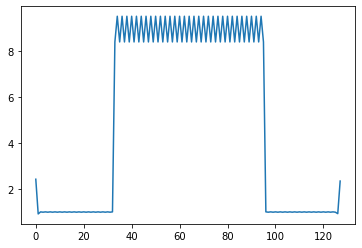

In [13]:
e_approx = np.zeros(n, dtype='complex')
for i in range(2*int(lmax)+1):
  e_approx += kappa[i]*plane_waves[i]

e_approx = e_approx**-1
print(np.max(np.real(e_approx)))
print(np.min(np.real(e_approx)))

plt.plot(np.real(e_approx))
plt.show()

In [66]:
Nk = 25
b = np.pi/a0
BZ = np.linspace(-b,b,Nk)
band_structure = []
eigenmodes = []

for k in BZ:
    print(k)
    
    A = KAPPA @ np.diag(np.abs(k+G)**2)
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(A)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
PWE_band_structure = np.array(band_structure)[:,:5] # keep the first 5 modes
PWE_eigenmodes = np.array(eigenmodes)[:,:5] # keep the first 5 modes

-3.141592653589793
-2.8797932657906435
-2.6179938779914944
-2.356194490192345
-2.0943951023931957
-1.8325957145940461
-1.5707963267948966
-1.3089969389957472
-1.0471975511965979
-0.7853981633974483
-0.5235987755982991
-0.2617993877991496
0.0
0.26179938779914913
0.5235987755982987
0.7853981633974478
1.0471975511965974
1.3089969389957465
1.5707963267948966
1.8325957145940457
2.094395102393195
2.356194490192345
2.617993877991494
2.879793265790643
3.141592653589793


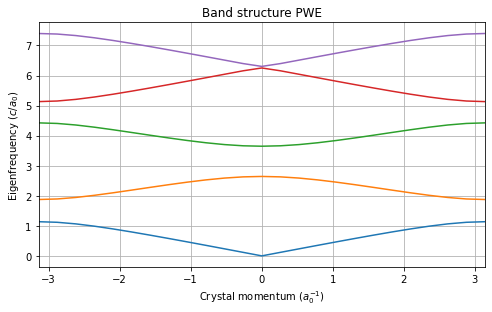

In [67]:
plt.figure(figsize=(8,4.5))
plt.title("Band structure PWE")
plt.plot(BZ, PWE_band_structure)
#plt.ylim([0,5])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")
plt.show()

In [68]:
np.save("finite_crystal_convergence_test/PWE_band_structure.npy", PWE_band_structure)